## <center> EDA

### 1. Import the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np
%matplotlib inline

### 2. Import data & data checking

In [2]:
df = pd.read_csv('/Users/natalie/Desktop/DS Thesis/Code/data/desktop_data_n.csv')
df.head()

,browser_id,churn_user,browser_id_hash,os_name,age_group,gender,country,region,province_type,province,...,pip_count,sidebar_count,incognito_count,signin_count,youtube_count,work_count,social_count,news_count,entertainment_count,ecommerce_count
0,ABDB3866-071A-4B1A-9A2C-2AF9ED43234A.-lckIf_in...,0,2099492072614341214,windows,18-24,female,VN,Northern Vietnam,urban,Hà Nội,...,0,0,0,22,35.0,156.0,1.0,51.0,2.0,0.0
1,F9B1821C-1CF5-4EF7-B3B9-CCF935302670.yBzIaK3yE...,0,16568884414000652324,windows,15-17,female,VN,Northern Vietnam,rural,Thái Nguyên,...,0,97,4,27,2870.0,4000.0,3220.0,12.0,639.0,94.0
2,00000000-0000-0000-0000-000000000001.gA8nTx73U...,0,2844554558337086803,windows,18-24,female,VN,Southern Vietnam,rural,Bình Dương,...,0,0,0,26,0.0,1945.0,8.0,23.0,0.0,426.0
3,3A5B7486-C30E-4EB7-B74F-500D79E83795.CP7tI6zBS...,0,11210571368678352983,windows,18-24,male,VN,Northern Vietnam,rural,Vĩnh Phúc,...,0,0,0,0,5.0,3.0,0.0,3.0,0.0,0.0
4,06789DA1-6203-4873-B758-A136F793A0E6.jZdkJE5ib...,0,10549784423905206384,windows,25-34,male,VN,Northern Vietnam,urban,Hà Nội,...,0,5,0,6,7.0,143.0,2.0,67.0,152.0,14.0


In [3]:
df.shape

(7902414, 48)

In [4]:
df.columns

Index(['browser_id', 'churn_user', 'browser_id_hash', 'os_name', 'age_group',
       'gender', 'country', 'region', 'province_type', 'province',
       'active_day', 'first_date', 'life_time', 'lastest_active_day',
       'not_active_day', 'total_active_time', 'clicks', 'search_volume',
       'dating_search', 'videoclip_search', 'technical_search',
       'housekeeping_family_search', 'marketing_search', 'other_search',
       'serp_click', 'search_volume_gg', 'search_clicks_gg', 'other_search_gg',
       'housekeeping_family_search_gg', 'videoclip_search_gg',
       'dating_search_gg', 'marketing_search_gg', 'technical_search_gg',
       'ads_impression', 'ads_click', 'ads_revenue', 'newtab_count',
       'download_count', 'pip_count', 'sidebar_count', 'incognito_count',
       'signin_count', 'youtube_count', 'work_count', 'social_count',
       'news_count', 'entertainment_count', 'ecommerce_count'],
      dtype='object')

In [5]:
#check the info of the train dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7902414 entries, 0 to 7902413
Data columns (total 48 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   browser_id                     object 
 1   churn_user                     int64  
 2   browser_id_hash                uint64 
 3   os_name                        object 
 4   age_group                      object 
 5   gender                         object 
 6   country                        object 
 7   region                         object 
 8   province_type                  object 
 9   province                       object 
 10  active_day                     int64  
 11  first_date                     object 
 12  life_time                      int64  
 13  lastest_active_day             object 
 14  not_active_day                 int64  
 15  total_active_time              float64
 16  clicks                         float64
 17  search_volume                  int64  
 18  da

In [6]:
# Check missing values
df.isna().sum()

browser_id                            0
churn_user                            0
browser_id_hash                       0
os_name                               0
age_group                             0
gender                                0
country                               0
region                           374197
province_type                         0
province                         374197
active_day                            0
first_date                            0
life_time                             0
lastest_active_day                    0
not_active_day                        0
total_active_time                553731
clicks                                0
search_volume                         0
dating_search                         0
videoclip_search                      0
technical_search                      0
housekeeping_family_search            0
marketing_search                      0
other_search                          0
serp_click                            0


In [8]:
df.groupby(['country', 'region']).size()

country  region          
VN       Central Vietnam     1423794
         Northern Vietnam    3545606
         Southern Vietnam    2558817
dtype: int64

In [9]:
df['country'].value_counts()

country
VN         7702685
UNKNOWN     190497
IN            9232
Name: count, dtype: int64

Missing data:
Country: 190497 (2,4%): Location can not be detected
Province and region: 374197 (4,7%) Location can not be detected or out of Vietnam
Age, gender: 1431115 (18%) Do not have information about age and gender. 
Dealing with missing data: 
- Fill missing data in 'country' with 'UNKNOWN'
- if country <> 'UNKNOWN' or 'VN', fill province and region with 'Abroad' else 'UNKNOWN
- Age, gender --> fill with 'unknown'

In [10]:
# Step 2: Fill missing data in 'province' and 'region' based on conditions for NA values only
df['region'].fillna('unknown', inplace=True)
df['province'].fillna('unknown', inplace=True)

In [71]:
# Define categorical variables
categorical_cols = ['churn_user', 'os_name', 'age_group', 'gender', 'country', 'region', 'province_type', 'province']

# Convert categorical variables to categorical type
for col in categorical_cols:
    df[col] = df[col].astype('category')

df.rename(columns={'search_volume': 'search_volume_cc'}, inplace=True)
df.rename(columns={'serp_click': 'serp_click_cc'}, inplace=True)

df['search_query'] = df['search_volume_gg'] + df['search_volume_cc']
df['search_result_click'] = df['search_clicks_gg'] + df['serp_click_cc']

df.rename(columns={'clicks': 'webs_traffic'}, inplace=True)

# Ensure numerical variables are in the correct format
numerical_cols = ['active_day', 'life_time',
       'not_active_day', 'total_active_time', 'webs_traffic', 'search_query', 'search_result_click', 'search_volume_cc',
       'dating_search', 'videoclip_search', 'technical_search',
       'housekeeping_family_search', 'marketing_search', 'other_search',
       'serp_click_cc', 'search_volume_gg', 'search_clicks_gg', 'other_search_gg',
       'housekeeping_family_search_gg', 'videoclip_search_gg',
       'dating_search_gg', 'marketing_search_gg', 'technical_search_gg',
       'ads_impression', 'ads_click', 'ads_revenue', 'newtab_count',
       'download_count', 'pip_count', 'sidebar_count', 'incognito_count',
       'signin_count', 'youtube_count', 'work_count', 'social_count',
       'news_count', 'entertainment_count', 'ecommerce_count']

df[numerical_cols] = df[numerical_cols].astype(float).fillna(0) # 0 mean users don't use that features/ do not have ads

In [72]:
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
active_day,7902414.0,10.518425,9.903657,1.0,2.0,6.0,18.000000,3.100000e+01
life_time,7902414.0,557.807876,505.137766,0.0,116.0,417.0,846.000000,1.760000e+03
not_active_day,7902414.0,7.056318,8.382515,0.0,1.0,3.0,12.000000,3.000000e+01
total_active_time,7902414.0,105512.962139,272592.700767,0.0,1074.0,13189.5,83872.000000,1.020823e+08
webs_traffic,7902414.0,888.373475,4144.370568,0.0,22.0,133.0,689.000000,3.061818e+06
search_query,7902414.0,44.493217,141.163228,0.0,1.0,8.0,42.000000,1.037690e+05
search_result_click,7902414.0,29.528574,84.732961,0.0,1.0,5.0,27.000000,7.418800e+04
search_volume_cc,7902414.0,20.389114,54.472467,0.0,0.0,3.0,18.000000,4.014500e+04
dating_search,7902414.0,1.454721,7.564105,0.0,0.0,0.0,1.000000,3.544000e+03
videoclip_search,7902414.0,2.507047,10.543318,0.0,0.0,0.0,1.000000,1.173800e+04


## Univariate Analysis

In [ ]:
# Explore churn users

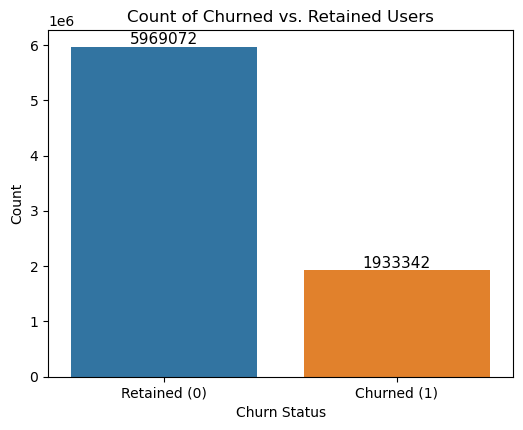

In [17]:
# Number of churn vs not churn
plt.figure(figsize=(6, 4.5))
ax = sns.countplot(x='churn_user', data=df)
plt.title('Count of Churned vs. Retained Users')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Retained (0)', 'Churned (1)'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()



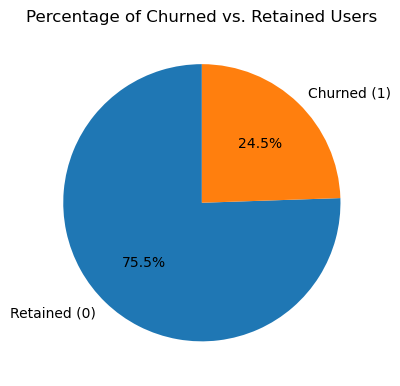

In [18]:
# Calculating the proportion of churned vs. not churned users
churn_counts = df['churn_user'].value_counts(normalize=True)

plt.figure(figsize=(6, 4.5))
plt.pie(churn_counts, labels=['Retained (0)', 'Churned (1)'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Churned vs. Retained Users')
plt.show()


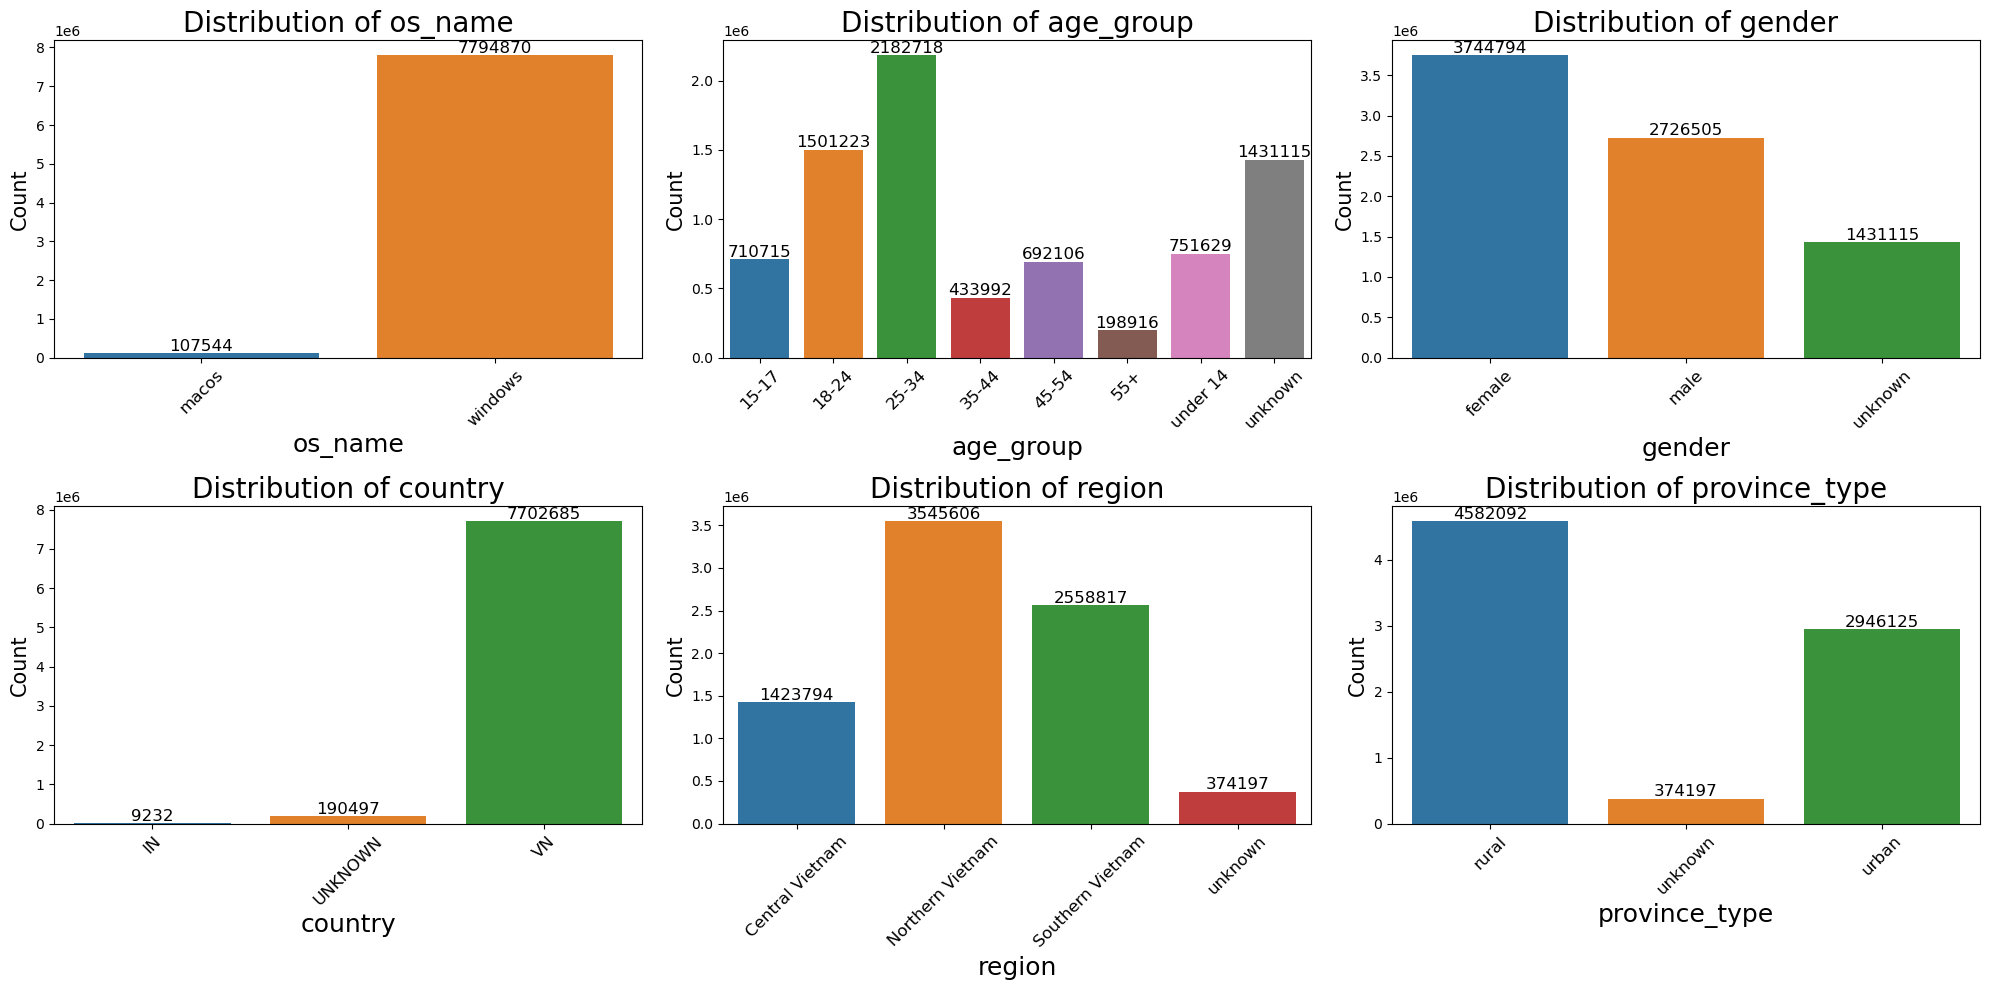

In [40]:
categorical_cols_to_chart = ['os_name', 'age_group', 'gender', 'country', 'region', 'province_type']

# Plot for categorical variables
# Plot for categorical variables
fig, axes = plt.subplots(nrows=int(np.ceil(len(categorical_cols_to_chart) / 3)), ncols=3, figsize=(20, 5 * np.ceil(len(categorical_cols_to_chart) / 3)))
axes = axes.flatten()

for i, col in enumerate(categorical_cols_to_chart):
    ax = sns.countplot(x=col, data=df, ax=axes[i])
    ax.set_title(f'Distribution of {col}', fontsize=20)
    ax.set_xlabel(col, fontsize=18)
    ax.set_ylabel('Count', fontsize=15)
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_fontsize(12)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


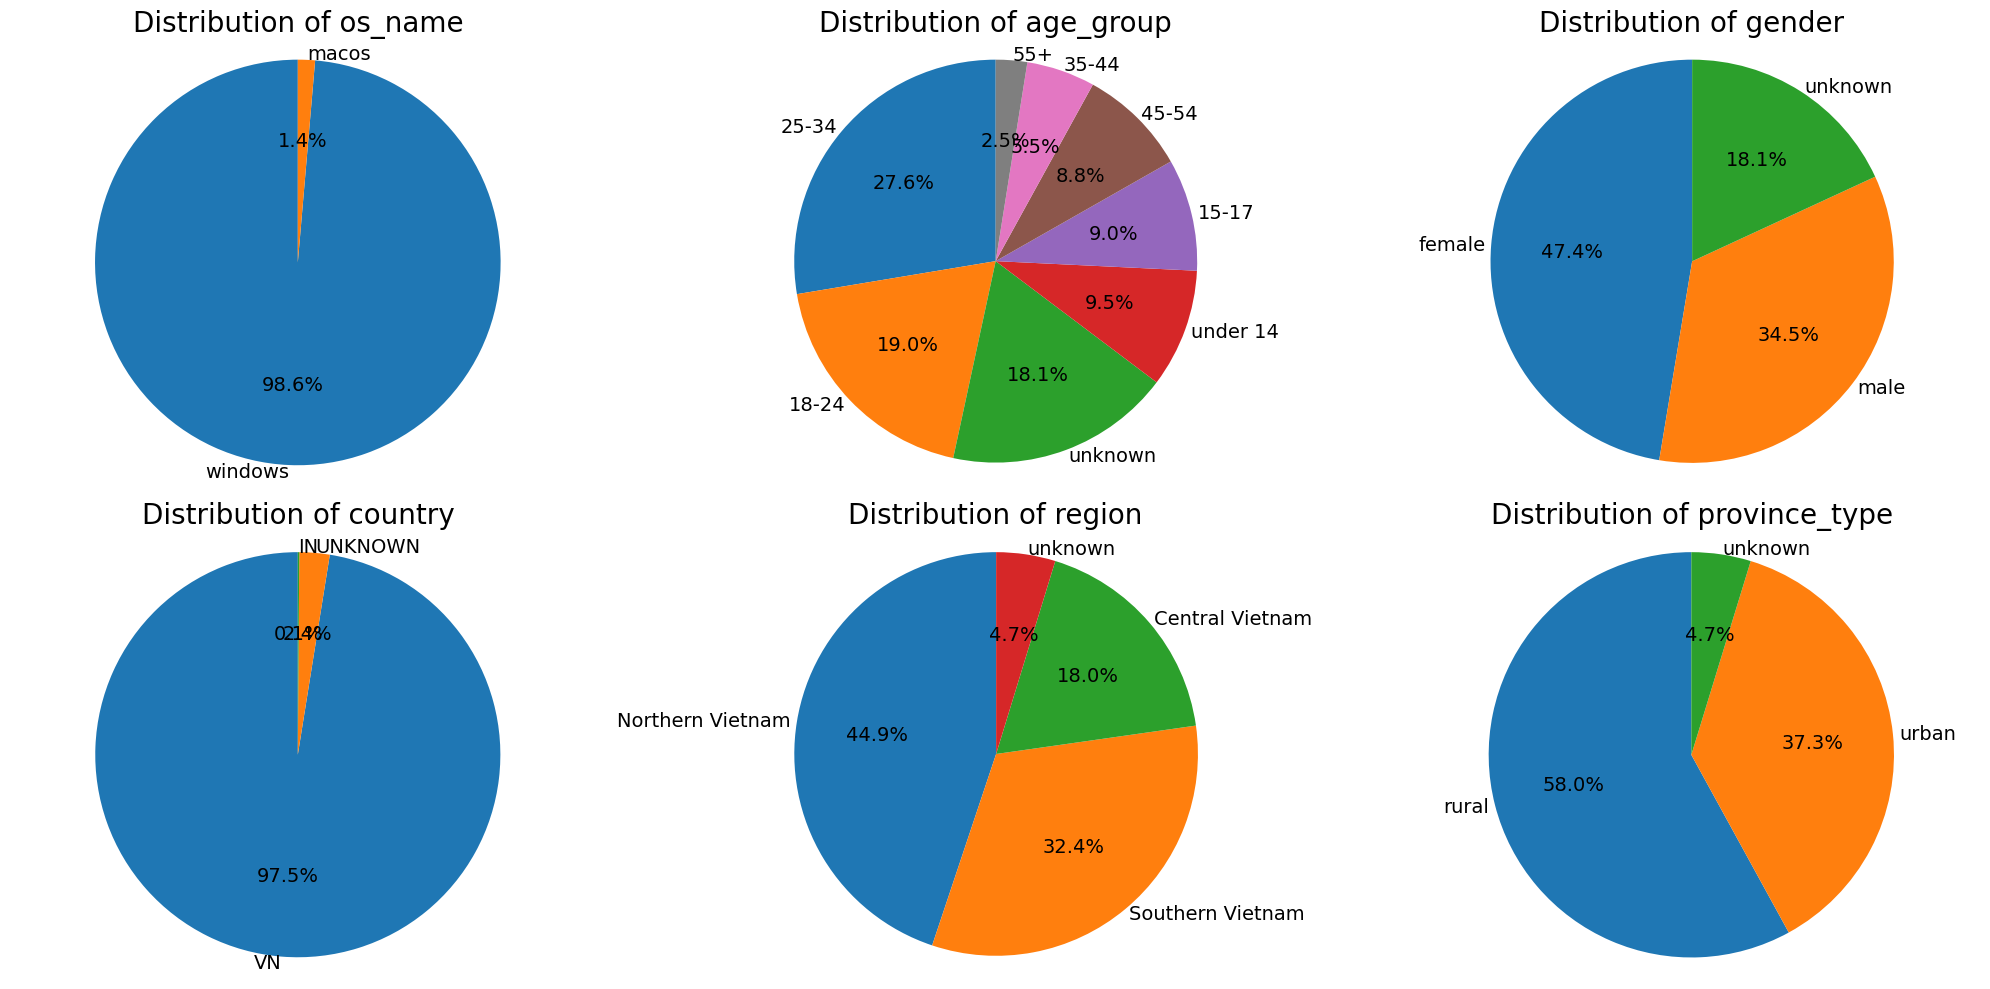

In [37]:
# Plot for categorical variables
fig, axes = plt.subplots(nrows=int(np.ceil(len(categorical_cols_to_chart) / 3)), ncols=3, figsize=(20, 5 * np.ceil(len(categorical_cols_to_chart) / 3)))
axes = axes.flatten()

for i, col in enumerate(categorical_cols_to_chart):
    data = df[col].value_counts()
    ax = axes[i]
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, labeldistance=1.03, textprops={'fontsize': 14})
    ax.set_title(f'Distribution of {col}', fontsize=20)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

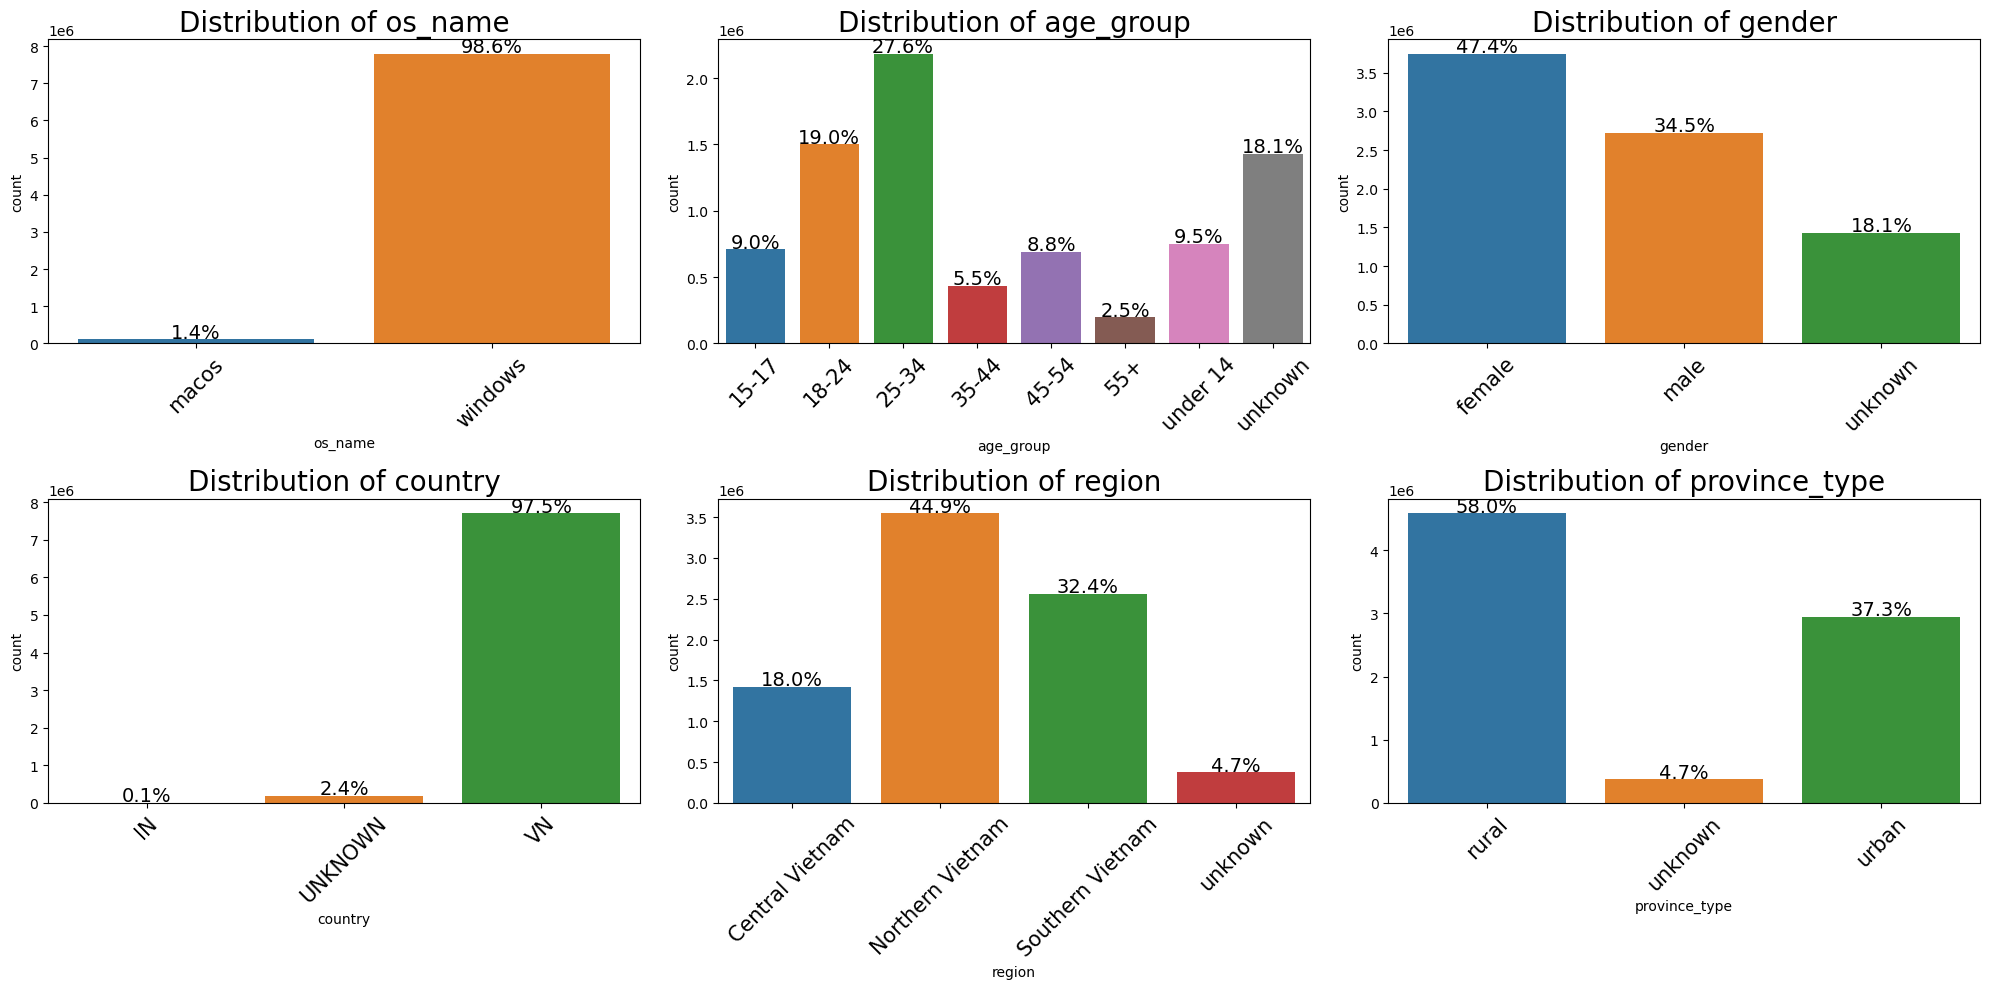

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'categorical_cols_to_chart' is defined
categorical_cols_to_chart = ['os_name', 'age_group', 'gender', 'country', 'region', 'province_type']

fig, axes = plt.subplots(nrows=int(np.ceil(len(categorical_cols_to_chart) / 3)), ncols=3, figsize=(20, 5 * np.ceil(len(categorical_cols_to_chart) / 3)))
for i, col in enumerate(categorical_cols_to_chart):
    row = i // 3
    col_pos = i % 3
    ax = sns.countplot(x=col, data=df, ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f'Distribution of {col}', fontsize=20)
    for label in axes[row, col_pos].get_xticklabels():
        label.set_rotation(45)
        label.set_fontsize(15)
    
    # Calculate total count for the current column to find percentages
    total = float(len(df[col]))
    # Add percentage labels
    for p in ax.patches:
        percentage = 100 * p.get_height() / total
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.tight_layout()
plt.show()


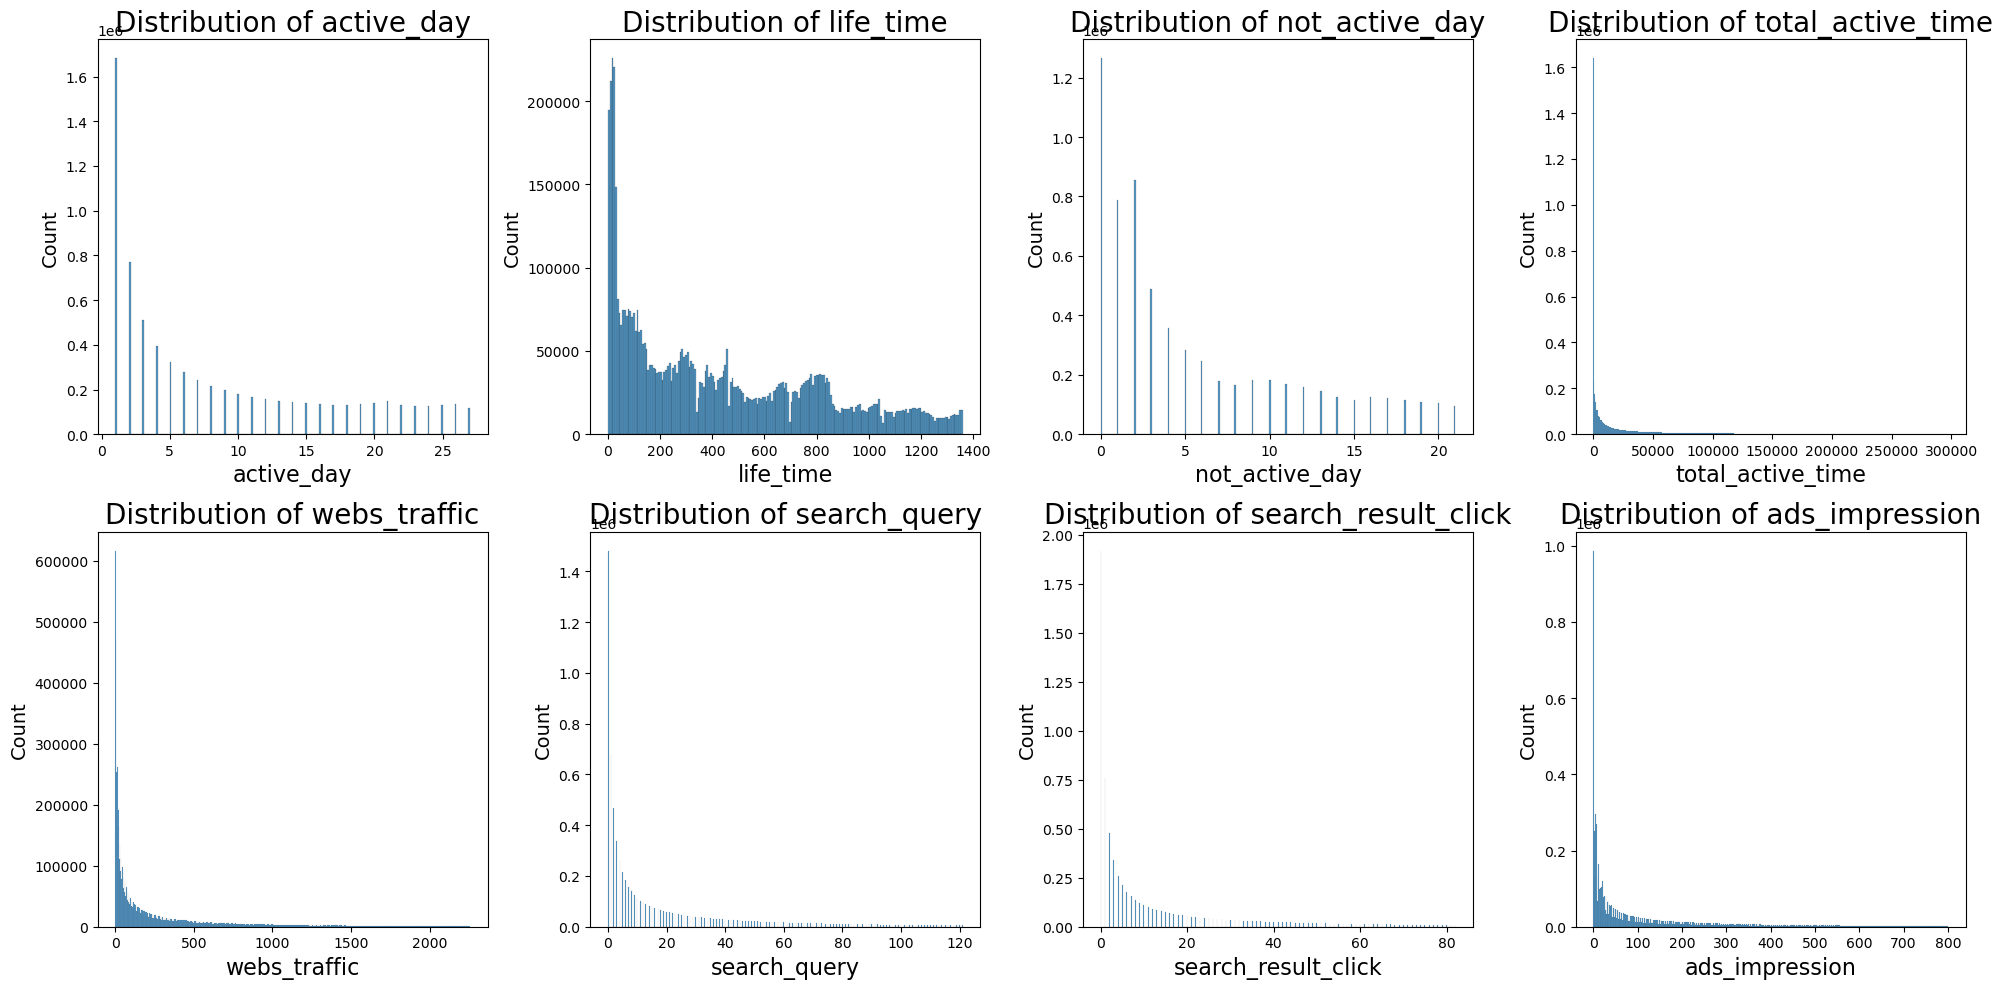

In [53]:
numerical_draft = ['active_day', 'life_time', 'not_active_day', 'total_active_time', 'webs_traffic', 'search_query', 'search_result_click', 'ads_impression']

# Calculate the 97.5th percentile for each variable in 'numerical_draft'
percentiles = df[numerical_draft].quantile(0.90)

filtered_df = pd.DataFrame()

# Apply filtering for each column based on its 95th percentile
for col in numerical_draft:
    upper_bound = percentiles[col]
    mask = df[col] <= upper_bound
    filtered_df[col] = df.loc[mask, col]

num_rows = (len(numerical_draft) + 3) // 4  
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows)) 
axes = axes.flatten()  

for i, col in enumerate(numerical_draft):
    sns.histplot(filtered_df[col].dropna(), kde=False, ax=axes[i])  
    axes[i].set_title(f'Distribution of {col}', fontsize=20) 
    axes[i].set_xlabel(col, fontsize=16)  
    axes[i].set_ylabel('Count', fontsize=14)  

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## Bivariate analysis

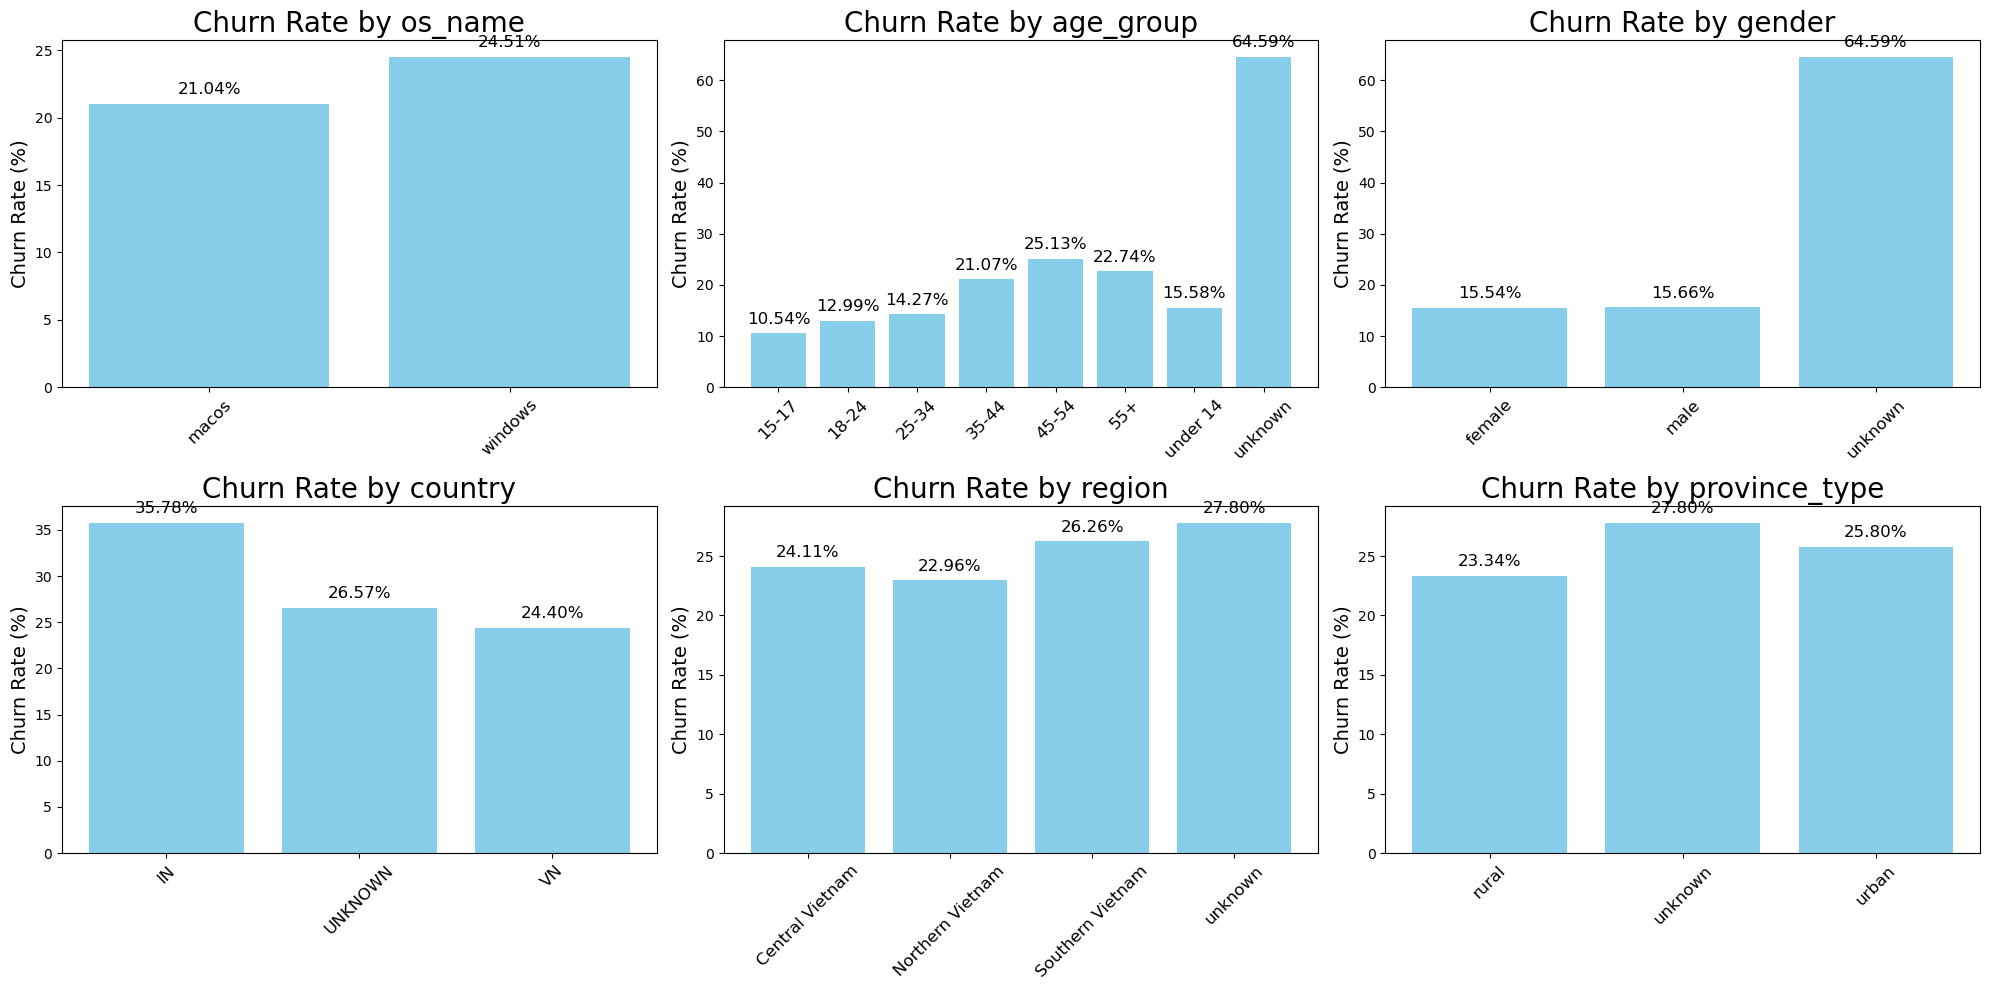

In [63]:
categorical_cols_to_chart = ['os_name', 'age_group', 'gender', 'country', 'region', 'province_type']

# Plot setup
fig, axes = plt.subplots(nrows=int(np.ceil(len(categorical_cols_to_chart) / 3)), ncols=3, figsize=(20, 10))
axes = axes.flatten()  # Flatten to iterate easily

for i, col in enumerate(categorical_cols_to_chart):
    # Calculate the counts of churned and not churned users in each category
    counts = df.groupby([col, 'churn_user']).size().unstack(fill_value=0)
    
    if 1 not in counts.columns:
        counts[1] = 0
    
    # Calculate percentages
    percentages = (counts[1] / counts.sum(axis=1)) * 100

    # Plot using the calculated percentages
    ax = axes[i]
    ax.bar(percentages.index, percentages, color='skyblue')
    ax.set_title(f'Churn Rate by {col}', fontsize=20)
    ax.set_ylabel('Churn Rate (%)', fontsize=14)
    ax.set_xlabel('', fontsize=16)
    ax.tick_params(axis='x', rotation=45, labelsize=12)

    # Adding data labels
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f"{height:.2f}%", (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=12, color='black', rotation=0, xytext=(0, 10),
                    textcoords='offset points')

# Hide any unused axes if the number of plots is not a multiple of 3
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

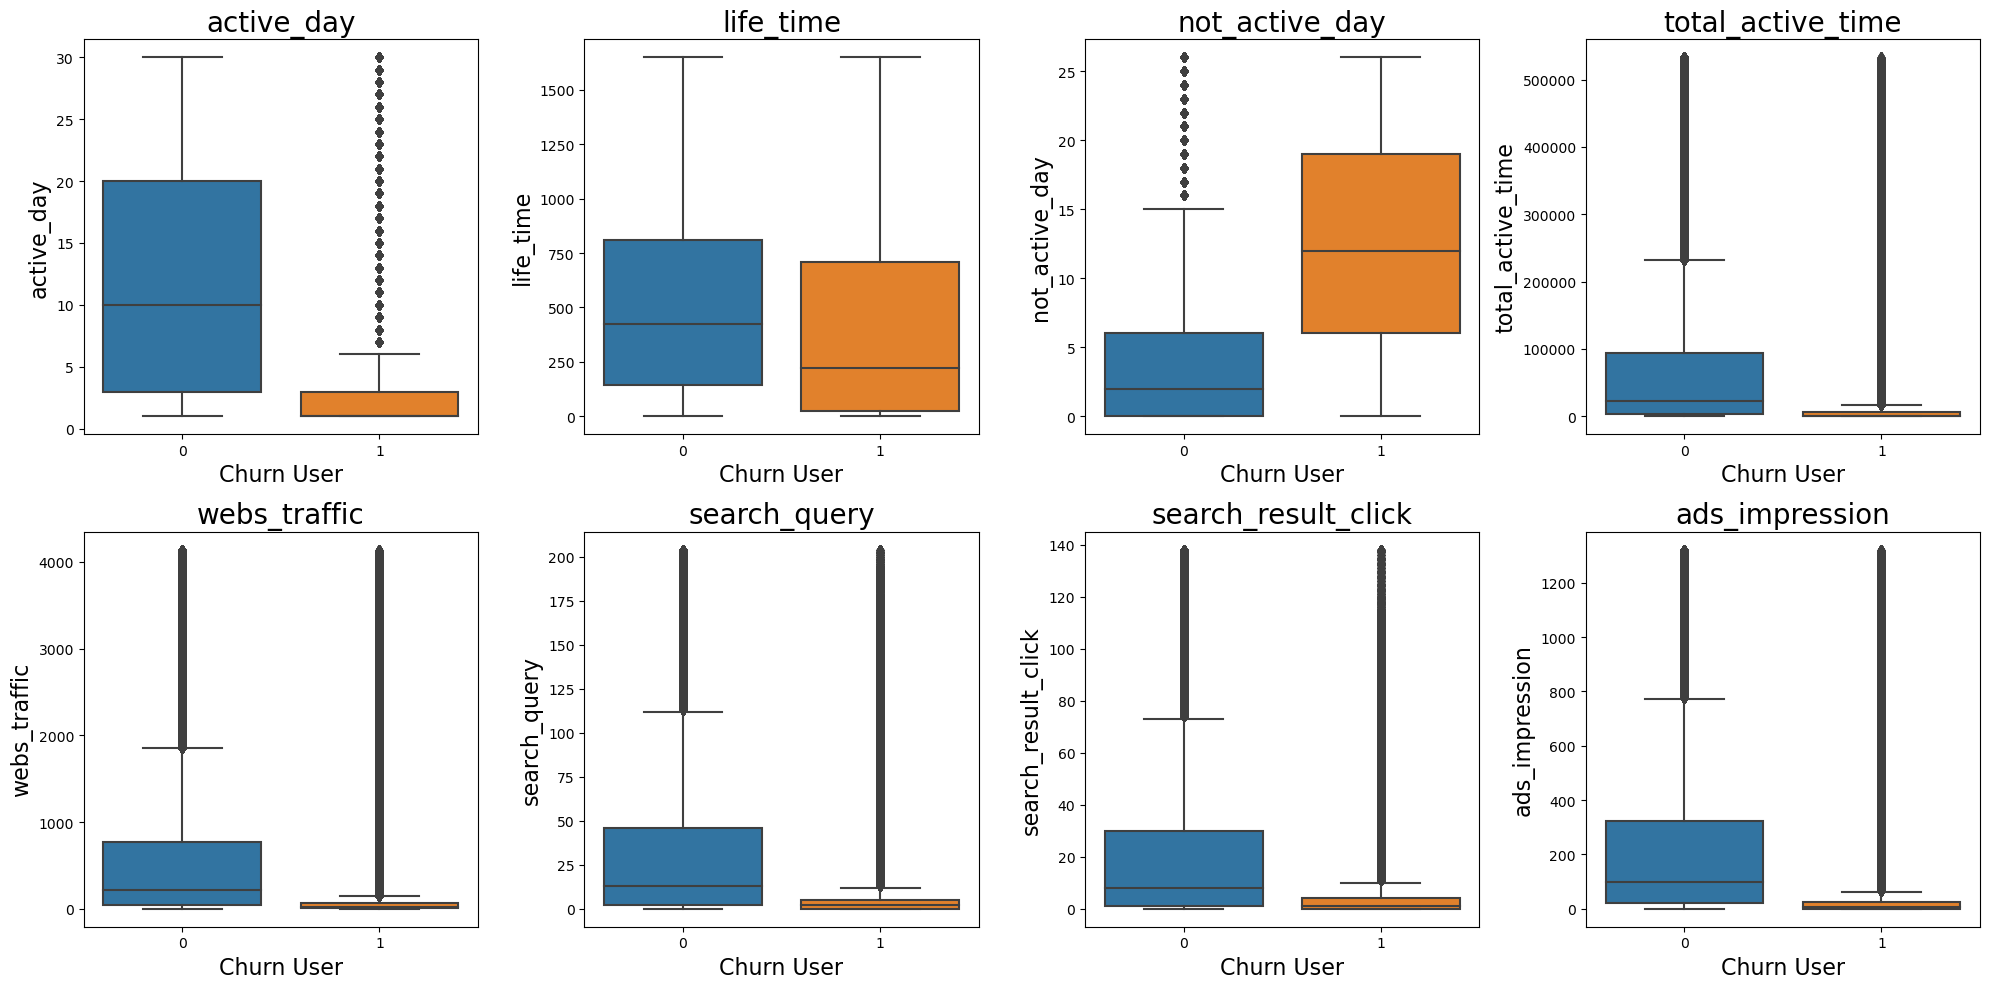

In [69]:
numerical_draft = ['active_day', 'life_time', 'not_active_day', 'total_active_time', 'webs_traffic', 'search_query', 'search_result_click', 'ads_impression']

# Calculate the number of rows needed for subplots with 4 columns per row
num_cols = 4
num_rows = (len(numerical_draft) + num_cols - 1) // num_cols

# Create a figure and axes with the calculated dimensions
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_draft):
    # Calculate the 95th percentile for the current column
    upper_bound = df[col].quantile(0.95)
    
    # Filter the DataFrame to exclude values above the 95th percentile for this column
    # And plot the boxplot for churn_user = 0 and churn_user = 1 within this filtered data
    sns.boxplot(x='churn_user', y=col, data=df[df[col] <= upper_bound], ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=20)
    axes[i].set_xlabel('Churn User', fontsize=16)
    axes[i].set_ylabel(col, fontsize=16)

# Hide any unused axes if the number of plots is not a multiple of num_cols
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
# Calculating Pearson correlation
pearson_corr = df[numerical_cols].corr(method='pearson')
print("Pearson Correlation:\n", pearson_corr)

In [77]:
high_corr_pairs = pearson_corr.unstack().reset_index()
high_corr_pairs.columns = ['Variable1', 'Variable2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Variable1'] != high_corr_pairs['Variable2']]
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > 0.8]

# Remove duplicate pairs
high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False).drop_duplicates(subset=['Correlation'])

# Display the result
print("Pairs with correlation coefficient > 0.8:")
print(high_corr_pairs)

Pairs with correlation coefficient > 0.8:
                         Variable1                      Variable2  Correlation
661                other_search_gg               search_volume_gg     0.934540
205                   search_query               search_volume_gg     0.926284
900                 ads_impression                   newtab_count     0.899771
501                   other_search               search_volume_cc     0.891510
539                  serp_click_cc               search_volume_cc     0.861254
207                   search_query                other_search_gg     0.849194
664                other_search_gg  housekeeping_family_search_gg     0.840442
699  housekeeping_family_search_gg               search_volume_gg     0.807902
614               search_clicks_gg            search_result_click     0.801185


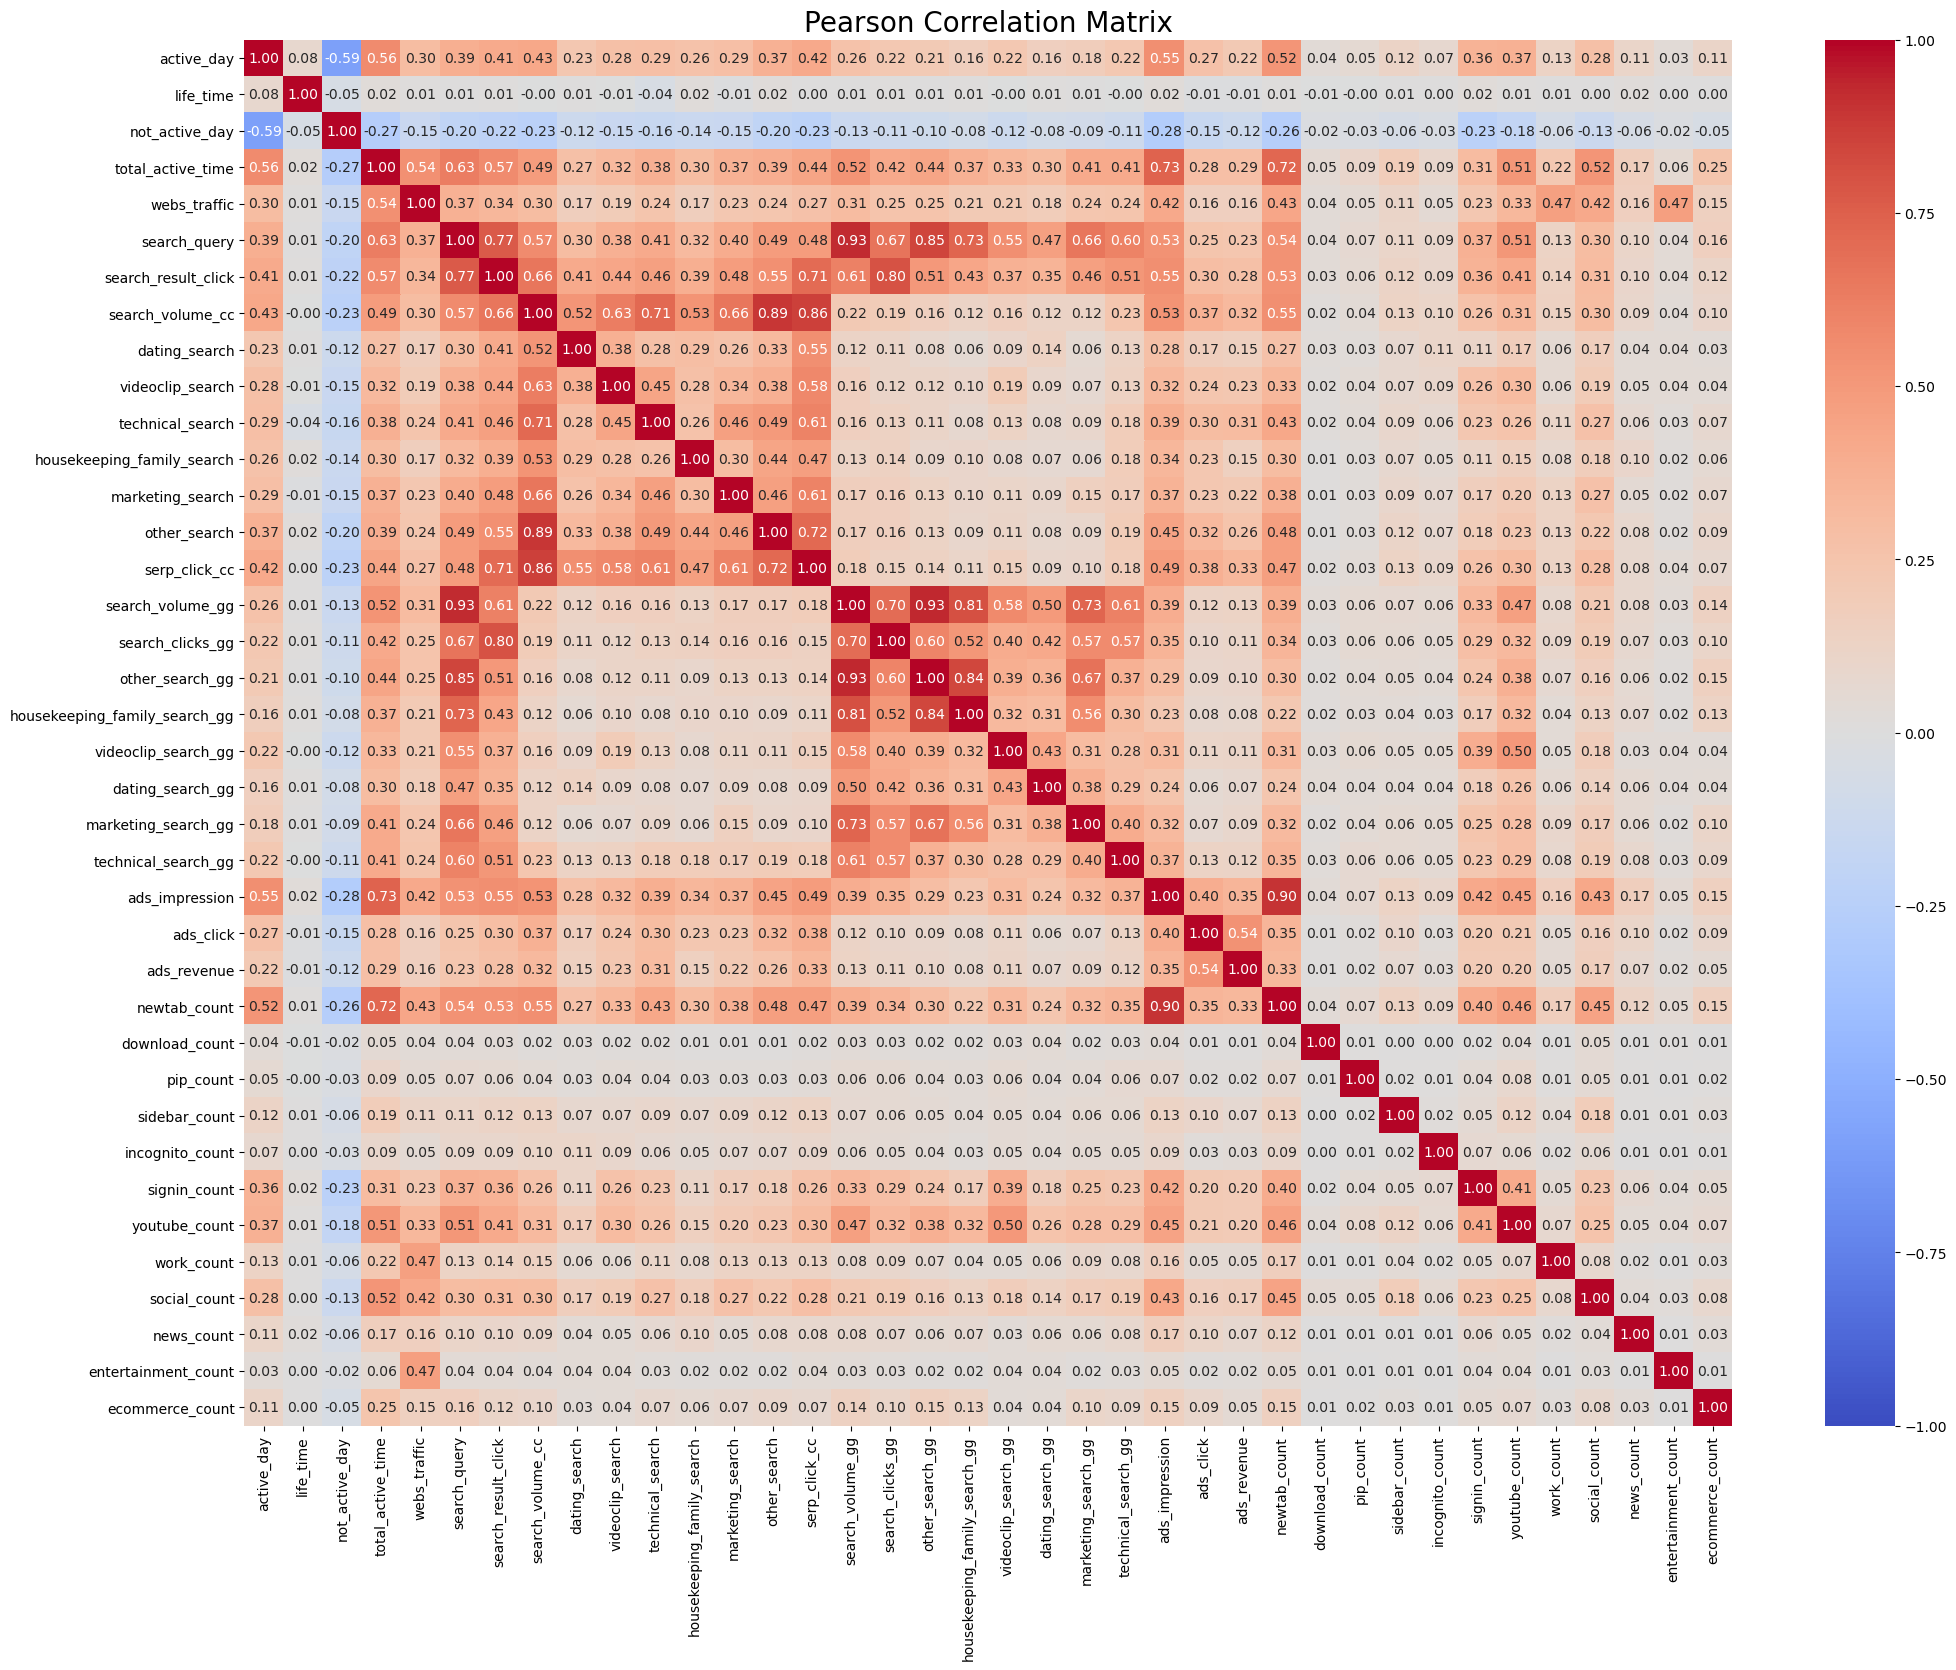

In [74]:

# Visualizing Pearson Correlation
plt.figure(figsize=(24, 18))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix', fontsize=20)
plt.show()

In [6]:
# Change proper data types
df[['browser_id_hash', 'is_exist', 'is_sign_in']] = df[['browser_id_hash', 'is_exist', 'is_sign_in']].astype('object')

In [7]:
list_astype = ['clicks_count', 'youtube_count', 'work_count', 'social_count', 'news_count', 'entertainment_count', 'ecommerce_count']
df[list_astype] = df[list_astype].astype('int64')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
browser_id_hash,4522788.0,9.222226e+18,5.324649e+18,5.263178e+12,4.608395e+18,9.223958e+18,1.383505e+19,1.844674e+19
life_time,4344639.0,2.280455e+02,2.707266e+02,0.000000e+00,4.200000e+01,1.260000e+02,3.200000e+02,1.760000e+03
not_active_day,4344639.0,1.632963e+01,1.863399e+01,0.000000e+00,1.000000e+00,7.000000e+00,3.000000e+01,6.000000e+01
download,2309737.0,9.715939e+00,6.421492e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.202300e+04
pip,2309737.0,3.253862e+00,2.343050e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.113000e+03
headset,2309737.0,8.613344e-01,1.302763e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.842000e+03
background,2309737.0,4.115197e+00,2.735242e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.113000e+03
cinema_mode,2309737.0,2.329752e+01,9.626081e+01,0.000000e+00,0.000000e+00,1.000000e+00,7.000000e+00,1.207600e+04
newtab_incognito,2309737.0,1.902866e+01,1.201557e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.043300e+04
playlist_play,2309737.0,1.305521e-01,4.587746e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.749000e+03
